In [86]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [124]:
!pip install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
%pwd

'/content/drive/My Drive/PIA/EJEMPLO_SCRAPY/proyecto_imdb/spiders'

In [52]:
!scrapy startproject proyecto_imdb "/content/drive/MyDrive/PIA/EJEMPLO_SCRAPY"

Error: scrapy.cfg already exists in /content/drive/MyDrive/PIA/EJEMPLO_SCRAPY


In [ ]:
%cd "/content/drive/MyDrive/PIA/EJEMPLO_SCRAPY/proyecto_imdb"

In [ ]:
!scrapy genspider imdb https://www.imdb.com

In [ ]:
%cd "/content/drive/MyDrive/PIA/EJEMPLO_SCRAPY/proyecto_imdb/spiders"

In [153]:
!scrapy crawl imdb -O imdb.json

2022-12-01 13:49:07 [scrapy.utils.log] INFO: Scrapy 2.7.1 started (bot: proyecto_imdb)
2022-12-01 13:49:07 [scrapy.utils.log] INFO: Versions: lxml 4.9.1.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.0, Twisted 22.10.0, Python 3.8.15 (default, Oct 12 2022, 19:14:39) - [GCC 7.5.0], pyOpenSSL 22.1.0 (OpenSSL 3.0.7 1 Nov 2022), cryptography 38.0.4, Platform Linux-5.10.133+-x86_64-with-glibc2.27
2022-12-01 13:49:07 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'proyecto_imdb',
 'NEWSPIDER_MODULE': 'proyecto_imdb.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['proyecto_imdb.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor',
 'USER_AGENT': 'proyecto_imdb (http://example.com)'}
2022-12-01 13:49:07 [asyncio] DEBUG: Using selector: EpollSelector
2022-12-01 13:49:07 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2022-12-01 13:49:07

In [ ]:
# !scrapy crawl imdb 2>&1 | tee crawl.log

In [148]:
%%writefile "/content/drive/MyDrive/imdb_v11.py"
# versión 12

from ast import YieldFrom
import scrapy
from scrapy.exceptions import CloseSpider


class Ej124112022V1Spider(scrapy.Spider):
    name = 'imdb'
    initial_url = 'https://www.imdb.com'
    start_urls = ['https://www.imdb.com/search/title/?genres=comedy&start=1&explore=title_type,genres&ref_=adv_nxt']
    page_number = 1
    outputs = 0
  
    def parse(self, response):        
        self.logger.info('****************************************************')
        self.logger.info('Hola, estamos en: %s', response.url)
        # --------------------------------------------------------------
        if self.page_number > 1: 
            raise CloseSpider('Spider closed')
        # --------------------------------------------------------------
        movies = response.css('div.lister-item-content')
        self.outputs += len(movies)
        print("\n-----------------------------------------------")        
        print(f"Num. total de películas hasta ahora: {self.outputs}")
        print("-----------------------------------------------\n")
        # --------------------------------------------------------------
        d = {"id":"", "title":"", "stars":"", "votes":"", "ru":"", "rc":"", "link":""}
        for i in movies:
            d["id"] =  i.css('h3 > span::text').get()
            d["title"] =  i.css('h3 > a::text').get()
            d["stars"] =  i.css('div > div > strong::text').get()
            d["votes"] =  i.css('p.sort-num_votes-visible').xpath('./span[@name="nv"]/text()').get()
            href = i.css('h3 > a::attr(href)').get()
            link = self.initial_url + href
            d["link"] = link
            request = scrapy.Request(url=link, callback=self.parse_detail)
            # d["ru"] = request.cb_kwargs['foo']
            request.cb_kwargs['foo'] = "bar"
            yield request
            # , cb_kwargs={'my_dict': d}
            #print("d is : ", request.cb_kwargs['my_dict'])
            # # yield { request.cb_kwargs["ru"] }
            # yield  {
            #     "id": d["id"],
            #     "title" : d["title"],
            #     "votes" : d["votes"],
            #     "link" : d["link"],
            #     "ru" : d["ru"],
            # }
        # --------------------------------------------------------------

        # --------------------------------------------------------------
        self.page_number += 1
        result = response.css('a.lister-page-next.next-page')
        href = result.css('a::attr("href")').get()
        next_page = self.initial_url + href      
        if (len(next_page) != 0):
            yield response.follow(next_page, callback=self.parse)


    def parse_detail(self, response, foo):
        # res = response.css('li > a > span > span::text').get()
        yield dict(foo : foo )
        # yield response.css('li > a > span > span::text').get()
        # response.cb_kwargs['my_dict']["rc"] = info
        #return result
        # yield  {
        #     "id": my_dict["id"],
        #     "title" : my_dict["title"],
        #     "stars" : my_dict["stars"],
        #     "votes" : my_dict["votes"],
        #     "link" : my_dict["link"],
        #     "ru" : my_dict["ru"],
        #     "reseñas" : my_dict["reseñas"]
        # }
        

            # response.urljoin(href)

            # res = yield scrapy.Request(url=link, callback=self.parse_additional_page, cb_kwargs={'item': item1})

            # --------------------------------------------------------------
  
            # my_dict = dict({})
            # # # my_dict = yield scrapy.Request(url=link, callback=self.parse_additional_page, cb_kwargs={'my_dict': my_dict})
            # # my_dict = yield response.follow(link, callback=self.parse_additional_page, cb_kwargs={'my_dict': my_dict})
            # # print(my_dict)
            # request = scrapy.Request(link,
            #   callback=self.parse_additional_page,
            #   cb_kwargs=my_dict)
            # print(my_dict)
            # yield request
            # print(request.cb_kwargs['k'])
            # print(f"================================")            
 
            # --------------------------------------------------------------
            
            # print(f"Num: {num} // title: {title} // Stars: {stars} // Votes: {votes} // Enlace: {link}")
            # yield {
            #   'title' : title,
            #   'num' : num 
            # }
 
            # --------------------------------------------------------------
 
            # res = yield scrapy.Request(url=link, callback=self.parse_additional_page, cb_kwargs={'item': item1})
            # yield scrapy.Request(url=link, callback=self.parse_additional_page, cb_kwargs={'result': lista})
  
            # --------------------------------------------------------------

            # num = i.css('h3 > span::text').get()
            # title = i.css('h3 > a::text').get()
            # href = i.css('h3 > a::attr(href)').get()
            # stars = i.css('div > div > strong::text').get()
            # votes = i.css('p.sort-num_votes-visible') \
            #     .xpath('./span[@name="nv"]/text()').get()
         # --------------------------------------------------------------

Overwriting /content/drive/MyDrive/imdb_v11.py


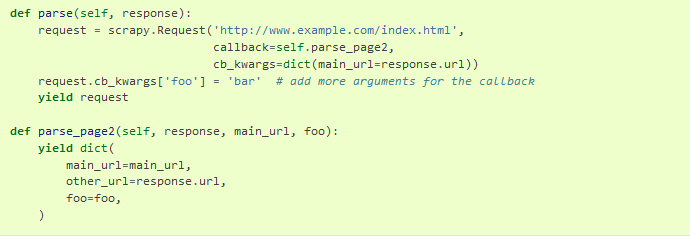

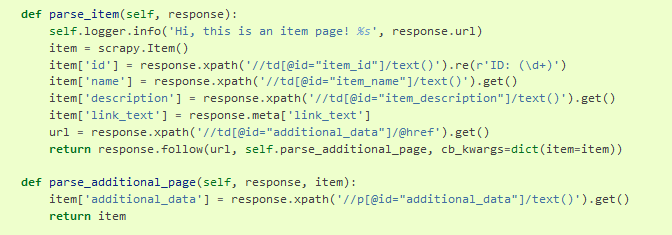